In [1]:
import pandas as pd
import numpy as np

In [2]:
encodings=['utf-8','latin1','ISO-8859-1','cp1252']
file_path='/content/drive/MyDrive/spam.csv'
for encoding in encodings:
  try:
    data=pd.read_csv(file_path,encoding=encoding)
    print(f"file success:{encoding}")
  except UnicodeDecodeError:
    print(f"failed{encoding}")
    continue


failedutf-8
file success:latin1
file success:ISO-8859-1
file success:cp1252


In [3]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2874,ham,"Idk. You keep saying that you're not, but sinc...",NaN,NaN,NaN
71,ham,Finished class where are you.,NaN,NaN,NaN
744,ham,Men like shorter ladies. Gaze up into his eyes.,NaN,NaN,NaN
3561,ham,Still chance there. If you search hard you wil...,NaN,NaN,NaN
128,ham,HEY GIRL. HOW R U? HOPE U R WELL ME AN DEL R B...,NaN,NaN,NaN


In [4]:
data.shape

(5572, 5)

data cleaning
EDA
text processing
model building
evalution
improvement
website
deploy


DATA CLEANING


In [5]:
#data cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
data.sample(5)

,v1,v2
3808,ham,At the funeral home with Audrey and dad
851,ham,"I am real, baby! I want to bring out your inne..."
481,ham,"Yo carlos, a few friends are already asking me..."
2258,ham,Sad story of a Man - Last week was my b'day. M...
1950,ham,Oh ic. I thought you meant mary jane.


In [8]:
data.rename(columns={'v1': 'target','v2':'text'},inplace=True)
data.sample(5)

,target,text
5313,ham,My sister going to earn more than me da.
466,ham,They don't put that stuff on the roads to keep...
2727,ham,Whatsup there. Dont u want to sleep
4577,spam,Urgent! call 09066350750 from your landline. Y...
1554,ham,Yeah we do totes. When u wanna?


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
data['target']=encoder.fit_transform(data['target'])

In [11]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
data.duplicated().sum()

403

In [14]:
data=data.drop_duplicates(keep='first')

In [15]:
data.duplicated().sum()

0

In [16]:
data.shape

(5169, 2)

EDA


In [17]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

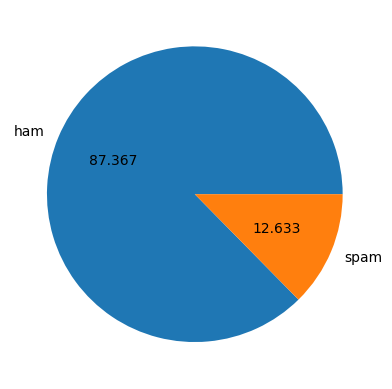

In [19]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct="%0.3f")
plt.show()

In [20]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
data['num_chars']=data['text'].apply(len)#number of characters

In [22]:
data.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))#words count in a  record

In [24]:
data.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
data['num_sentence']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
data.head()

,target,text,num_chars,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
data[['num_chars','num_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#targeting the ham
data[data['target']==0][['num_chars','num_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#spam
data[data['target']==1][['num_chars','num_words','num_sentence']].describe()

,num_chars,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

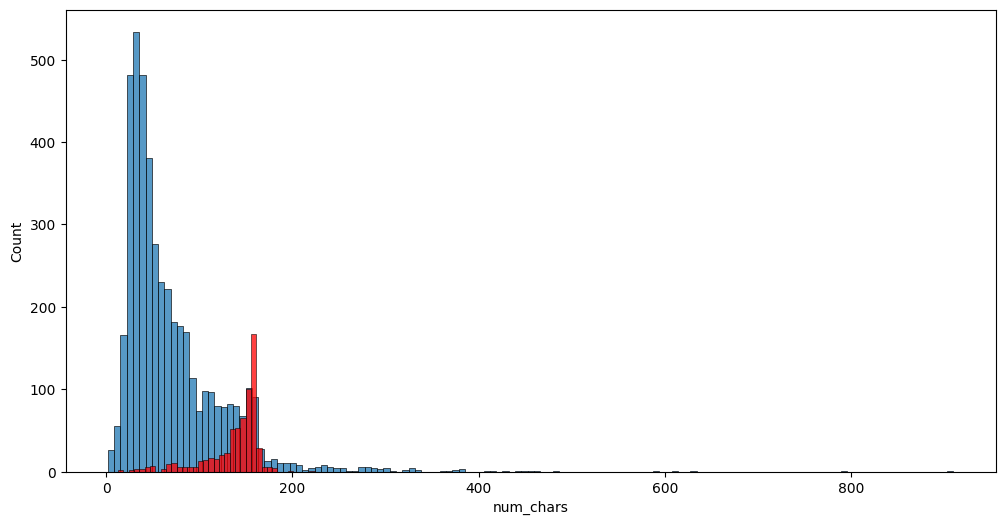

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_chars'])
sns.histplot(data[data['target']==1]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

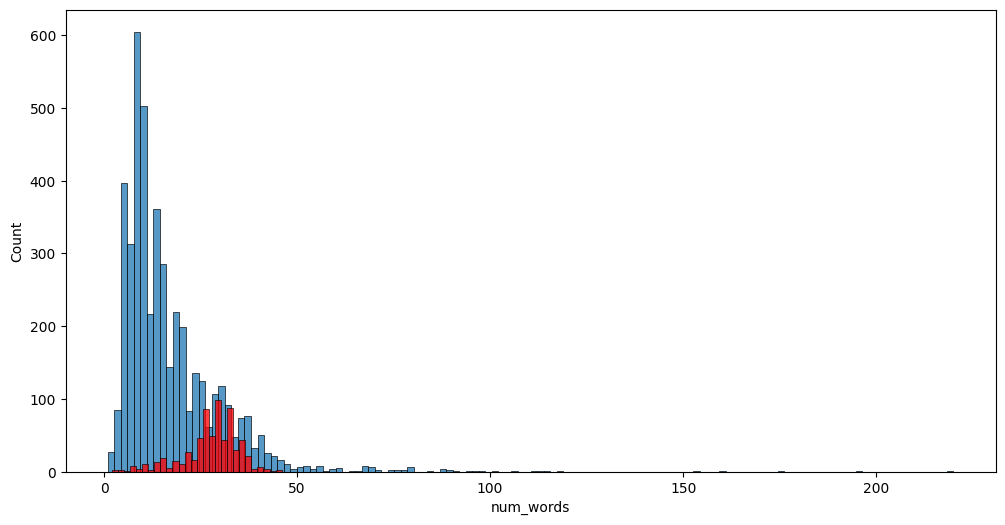

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_words'])
sns.histplot(data[data['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentence', ylabel='Count'>

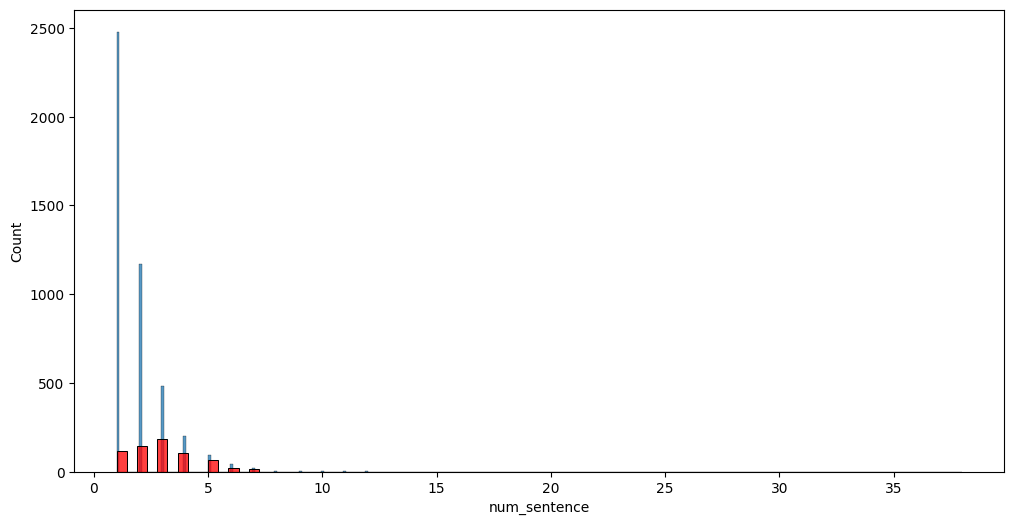

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_sentence'])
sns.histplot(data[data['target']==1]['num_sentence'],color='red')

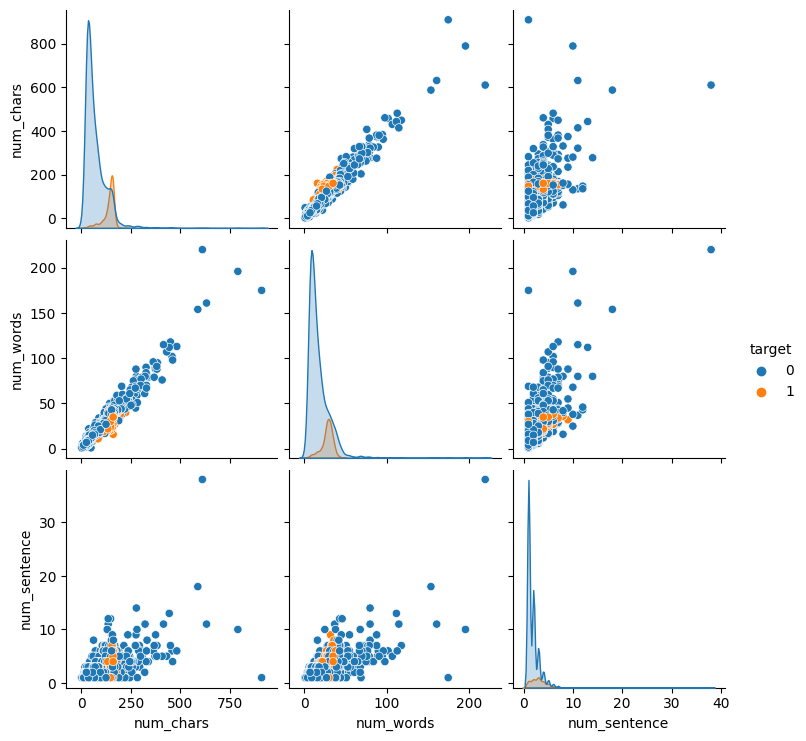

In [34]:
sns.pairplot(data,hue='target')

<ipython-input-35-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

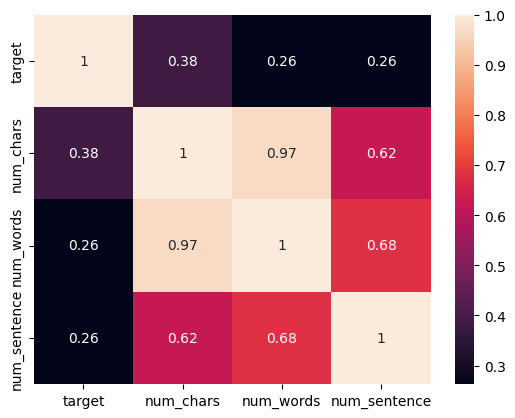

In [35]:
sns.heatmap(data.corr(),annot=True)

Data Preprocessing

In [36]:
#lower case
#tokenization
#removing the special charcters
#removing the stop words
#stemming
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
ps=PorterStemmer()
def t_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return" ".join(y)
t_texts=t_text("I am gonna be the Stupid of the Year 2022")
print(t_texts)



gon na stupid year 2022


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
t_text(data['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [38]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('tiktoking')

'tiktok'

In [39]:
data['transformed_text']=data['text'].apply(t_text)#method

In [40]:
data.head()

,target,text,num_chars,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
spam_wc=wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=""))

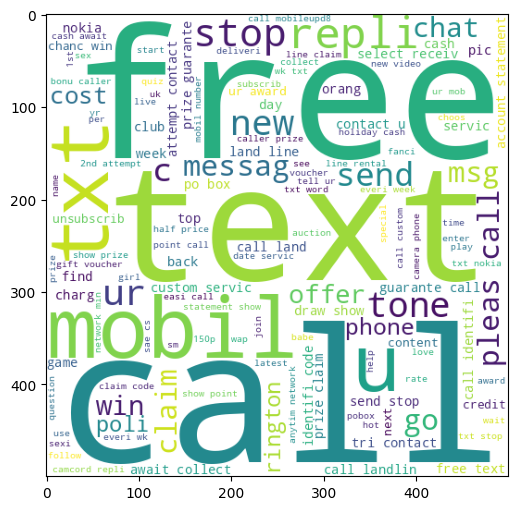

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [44]:
ham_wc=wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=""))

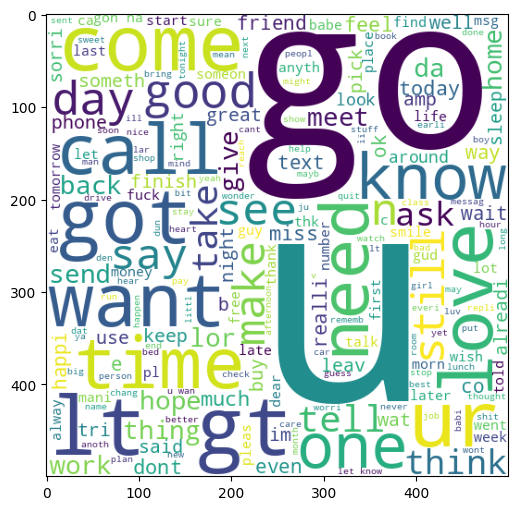

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [46]:
data.head()

,target,text,num_chars,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
spam_corpus=[]
for i in data[data['target']==1]['transformed_text'].tolist():
  for y in i.split():
    spam_corpus.append(y)

In [48]:
len(spam_corpus)

9939

In [49]:
'''import pandas as pd
import seaborn as sns
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()'''

"import pandas as pd\nimport seaborn as sns\nfrom collections import Counter\nsns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])\nplt.xticks(rotation='vertical')\nplt.show()"

In [50]:
ham_corpus=[]
for y in data[data['target']==0]['transformed_text'].tolist():
  for i in y.split():
    ham_corpus.append(i)

In [51]:
len(ham_corpus)

35404

In [52]:
'''import pandas as pd
import seaborn as sns
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()'''

"import pandas as pd\nimport seaborn as sns\nfrom collections import Counter\nsns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])\nplt.xticks(rotation='vertical')\nplt.show()"

In [53]:
data.head()

,target,text,num_chars,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Building Model


In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)


In [55]:
x=tfidf.fit_transform(data['transformed_text']).toarray()

In [56]:
x.shape

(5169, 3000)

In [57]:
y=data['target'].values

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [60]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [61]:
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

In [62]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [63]:
bnb.fit(x_train,y_train)
y_pred1=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [64]:


mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [65]:
  !pip install xgboost

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [67]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)

In [68]:
clfs={
    'SVC':svc,
    "KN":knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [69]:
def t_c(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [70]:
t_c(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [71]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
  current_accuracy,current_precision=t_c(clf,x_train,y_train,x_test,y_test)
  print("For",name)
  print("accuracy-",current_accuracy)
  print("precision-",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
accuracy- 0.9758220502901354
precision- 0.9747899159663865
For KN
accuracy- 0.9052224371373307
precision- 1.0
For NB
accuracy- 0.9709864603481625
precision- 1.0
For DT
accuracy- 0.9294003868471954
precision- 0.8282828282828283
For LR
accuracy- 0.9584139264990329
precision- 0.9702970297029703
For RF
accuracy- 0.9758220502901354
precision- 0.9829059829059829
For AdaBoost
accuracy- 0.960348162475822
precision- 0.9292035398230089
For Bgc
accuracy- 0.9584139264990329
precision- 0.8682170542635659
For ETC
accuracy- 0.9748549323017408
precision- 0.9745762711864406
For GBDT
accuracy- 0.9468085106382979
precision- 0.9191919191919192
For xgb
accuracy- 0.9671179883945842
precision- 0.9262295081967213


In [72]:
pp_df=pd.DataFrame({'Algoritms':clfs.keys(),'Accuracy':accuracy_scores,'precision':precision_scores})

In [73]:
pp_df

,Algoritms,Accuracy,precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.929400,0.828283
4,LR,0.958414,0.970297
5,RF,0.975822,0.982906
6,AdaBoost,0.960348,0.929204
7,Bgc,0.958414,0.868217
8,ETC,0.974855,0.974576
9,GBDT,0.946809,0.919192


In [74]:
pp_df1=pd.melt(pp_df,id_vars="Algoritms")

In [75]:
pp_df1

,Algoritms,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,NB,Accuracy,0.970986
3,DT,Accuracy,0.929400
4,LR,Accuracy,0.958414
5,RF,Accuracy,0.975822
6,AdaBoost,Accuracy,0.960348
7,Bgc,Accuracy,0.958414
8,ETC,Accuracy,0.974855
9,GBDT,Accuracy,0.946809


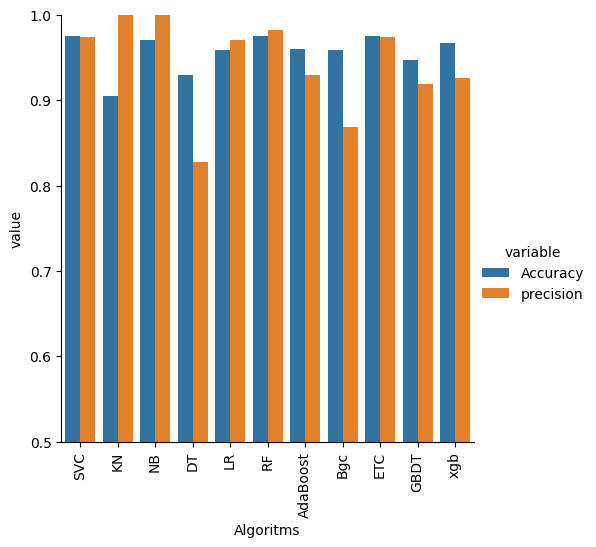

In [76]:
sns.catplot(x='Algoritms',y='value',hue='variable',data=pp_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [77]:
temp_df=pd.DataFrame({'Algoritms':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'precision_max_ft_3000':precision_scores})

In [78]:
new_df=pp_df.merge(temp_df,on='Algoritms')

In [79]:
new_df_scaled=new_df.merge(temp_df,on='Algoritms')

In [80]:
temp_df=pd.DataFrame({'Algoritms':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores})

In [81]:
new_df_scaled.merge(temp_df,on='Algoritms')

,Algoritms,Accuracy,precision,Accuracy_max_ft_3000_x,precision_max_ft_3000_x,Accuracy_max_ft_3000_y,precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
1,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
2,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
3,DT,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283
4,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
5,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,Bgc,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
8,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
9,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192


In [82]:
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier

In [83]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [84]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [85]:
y_pred=voting.predict(x_test)
print("accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

accuracy 0.9816247582205029
precision 0.9917355371900827


In [86]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [87]:
from sklearn.ensemble import StackingClassifier

In [88]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [89]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))

accuracy 0.9806576402321083
precision 0.9538461538461539


In [90]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [96]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
x_train=['Sample text 1','Sample test 2 ','Sample text 3']
y_train=[0,1,0]
tfidf = TfidfVectorizer(lowercase=True,stop_words='english')
x_train_tfidf = tfidf.fit_transform(x_train)
mnb=MultinomialNB(alpha=0.0001 )
mnb.fit(x_train_tfidf,y_train)
with open('vectorizer.pkl','wb') as vectorizer_file:
  pickle.dump(tfidf,vectorizer_file)
with open('model.pkl','wb') as model_file:
  pickle.dump(mnb,model_file)
